# Importing Basic Libraries

In [1]:

import numpy as np
import pandas as pd

#Data Visualiztaion Libraries
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

#jupyter notebook widgets for interactive analysis
import ipywidgets as widgets
from ipywidgets import interact
from ipywidgets import interact_manual

#for interactive shells
from IPython.display import display

#Supress Warnings
import warnings
warnings.filterwarnings('ignore')

#Setting up the chart size and background
plt.rcParams['figure.figsize'] =(16,5)
plt.style.use('fivethirtyeight')



In [2]:
#Available styles for charts
#plt.style.available

# Reading the Dataset

In [3]:
data= pd.read_csv("./movie_metadata.csv")

In [4]:
data.shape

(5043, 28)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      5024 non-null   object 
 1   director_name              4939 non-null   object 
 2   num_critic_for_reviews     4993 non-null   float64
 3   duration                   5028 non-null   float64
 4   director_facebook_likes    4939 non-null   float64
 5   actor_3_facebook_likes     5020 non-null   float64
 6   actor_2_name               5030 non-null   object 
 7   actor_1_facebook_likes     5036 non-null   float64
 8   gross                      4159 non-null   float64
 9   genres                     5043 non-null   object 
 10  actor_1_name               5036 non-null   object 
 11  movie_title                5043 non-null   object 
 12  num_voted_users            5043 non-null   int64  
 13  cast_total_facebook_likes  5043 non-null   int64

In [6]:
pd.reset_option('max_columns')
data.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [7]:
data=data.drop(['color',
                'director_facebook_likes',
                'actor_3_facebook_likes',
                'actor_1_facebook_likes',
                'cast_total_facebook_likes',
                'facenumber_in_poster',
                'actor_2_facebook_likes',
                'aspect_ratio',
                'plot_keywords',
                'content_rating',
                'country',
                'movie_imdb_link',
               ], axis=1)


In [8]:
data.head()

,director_name,num_critic_for_reviews,duration,actor_2_name,gross,genres,actor_1_name,movie_title,num_voted_users,actor_3_name,num_user_for_reviews,language,budget,title_year,imdb_score,movie_facebook_likes
0,James Cameron,723.0,178.0,Joel David Moore,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,Wes Studi,3054.0,English,237000000.0,2009.0,7.9,33000
1,Gore Verbinski,302.0,169.0,Orlando Bloom,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,Jack Davenport,1238.0,English,300000000.0,2007.0,7.1,0
2,Sam Mendes,602.0,148.0,Rory Kinnear,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,Stephanie Sigman,994.0,English,245000000.0,2015.0,6.8,85000
3,Christopher Nolan,813.0,164.0,Christian Bale,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,Joseph Gordon-Levitt,2701.0,English,250000000.0,2012.0,8.5,164000
4,Doug Walker,NaN,NaN,Rob Walker,NaN,Documentary,Doug Walker,Star Wars: Episode VII - The Force Awakens ...,8,NaN,NaN,NaN,NaN,NaN,7.1,0


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   director_name           4939 non-null   object 
 1   num_critic_for_reviews  4993 non-null   float64
 2   duration                5028 non-null   float64
 3   actor_2_name            5030 non-null   object 
 4   gross                   4159 non-null   float64
 5   genres                  5043 non-null   object 
 6   actor_1_name            5036 non-null   object 
 7   movie_title             5043 non-null   object 
 8   num_voted_users         5043 non-null   int64  
 9   actor_3_name            5020 non-null   object 
 10  num_user_for_reviews    5022 non-null   float64
 11  language                5031 non-null   object 
 12  budget                  4551 non-null   float64
 13  title_year              4935 non-null   float64
 14  imdb_score              5043 non-null   

# Missing Values Treatment

In [10]:
data.isnull().sum()

director_name             104
num_critic_for_reviews     50
duration                   15
actor_2_name               13
gross                     884
genres                      0
actor_1_name                7
movie_title                 0
num_voted_users             0
actor_3_name               23
num_user_for_reviews       21
language                   12
budget                    492
title_year                108
imdb_score                  0
movie_facebook_likes        0
dtype: int64

In [11]:
round(100*(data.isnull().sum()/len(data.index)),2)

director_name              2.06
num_critic_for_reviews     0.99
duration                   0.30
actor_2_name               0.26
gross                     17.53
genres                     0.00
actor_1_name               0.14
movie_title                0.00
num_voted_users            0.00
actor_3_name               0.46
num_user_for_reviews       0.42
language                   0.24
budget                     9.76
title_year                 2.14
imdb_score                 0.00
movie_facebook_likes       0.00
dtype: float64

In [12]:
# Observation: gross and budget have large number of missing values however being importnat columns, they cannot be dropped
# Solution: drop the rows with NaNs in 'gross' or 'budget'

data=data[~np.isnan(data['gross'])]
data=data[~np.isnan(data['budget'])]

In [13]:
data.isnull().sum()

director_name              0
num_critic_for_reviews     1
duration                   1
actor_2_name               5
gross                      0
genres                     0
actor_1_name               3
movie_title                0
num_voted_users            0
actor_3_name              10
num_user_for_reviews       0
language                   3
budget                     0
title_year                 0
imdb_score                 0
movie_facebook_likes       0
dtype: int64

In [14]:
#SInce all the entries are important, drop the rows with >2 missing values

data=data[data.isnull().sum(axis=1) <=2]
data.isnull().sum()

director_name             0
num_critic_for_reviews    1
duration                  1
actor_2_name              2
gross                     0
genres                    0
actor_1_name              0
movie_title               0
num_voted_users           0
actor_3_name              7
num_user_for_reviews      0
language                  3
budget                    0
title_year                0
imdb_score                0
movie_facebook_likes      0
dtype: int64

In [15]:
#imputing missing values

#using mean for numerical columns
data['num_critic_for_reviews'].fillna(data['num_critic_for_reviews'].mean(),inplace=True)
data['duration'].fillna(data['duration'].mean(),inplace=True)


#use unknown for missing actor names as they are not popular else, wont be missing
data['actor_2_name'].fillna('Unknown Actor', inplace=True)
data['actor_3_name'].fillna('Unknown Actor', inplace=True)

#use mode for categorical data
data['language'].fillna(data['language'].mode()[0], inplace=True)

In [16]:
data.isnull().sum().sum()

0

All missing values have been imputed :)

# Feature Engineering

### Top 10 profitable movies

In [17]:
#converting gross and budget to Million $ for readability

data['gross']=data['gross']/1000000
data['budget']=data['budget']/1000000

In [18]:
#creating a new column profit 

data['profit']=data['gross']-data['budget']

In [19]:
#Finding top 10 most profitable movies

data[['profit','movie_title']].sort_values(by='profit', ascending= False).head(10)

,profit,movie_title
0,523.505847,Avatar
29,502.177271,Jurassic World
26,458.672302,Titanic
3024,449.935665,Star Wars: Episode IV - A New Hope
3080,424.449459,E.T. the Extra-Terrestrial
794,403.279547,The Avengers
17,403.279547,The Avengers
509,377.783777,The Lion King
240,359.544677,Star Wars: Episode I - The Phantom Menace
66,348.316061,The Dark Knight


In [20]:
#Observation: The data has duplicate values
#Solution: Drop rows with Duplicate values

print("No.of rows before removing duplicates: ", data.shape[0])
data.drop_duplicates(subset=None, keep='first', inplace=True)
print("No.of rows after removing duplicates: ", data.shape[0])



No.of rows before removing duplicates:  3888
No.of rows after removing duplicates:  3853


In [21]:
#Finding top 10 most profitable movies

data[['profit','movie_title']].sort_values(by='profit', ascending= False).head(10)

,profit,movie_title
0,523.505847,Avatar
29,502.177271,Jurassic World
26,458.672302,Titanic
3024,449.935665,Star Wars: Episode IV - A New Hope
3080,424.449459,E.T. the Extra-Terrestrial
17,403.279547,The Avengers
509,377.783777,The Lion King
240,359.544677,Star Wars: Episode I - The Phantom Menace
66,348.316061,The Dark Knight
439,329.999255,The Hunger Games


We have found the top 10 movies. Interestingly there are 2 movies from Star Wars franchise in Top 10

### Duration and Language Categories

In [25]:
data['language'].value_counts()

English       3673
French          37
Spanish         26
Mandarin        14
German          13
Japanese        12
Hindi           10
Cantonese        8
Italian          7
Portuguese       5
Korean           5
Norwegian        4
Dutch            3
Persian          3
Thai             3
Hebrew           3
Danish           3
Aboriginal       2
Dari             2
Indonesian       2
Russian          1
Romanian         1
Vietnamese       1
Arabic           1
Dzongkha         1
Zulu             1
None             1
Aramaic          1
Czech            1
Telugu           1
Icelandic        1
Filipino         1
Hungarian        1
Maya             1
Bosnian          1
Mongolian        1
Kazakh           1
Swedish          1
Name: language, dtype: int64

In [26]:
#Observation: Non English movies do not exceed 200
#Solution: Label all Non-English movies as Foreign

def language(x):
    if x=="English":
        return 'English'
    else:
        return 'Foreign'
    
#Applying language function on the data     
data['language']=data['language'].apply(language)

data['language'].value_counts()

English    3673
Foreign     180
Name: language, dtype: int64

In [27]:
data['duration'].value_counts()

101.0    113
100.0    109
98.0     105
95.0      97
99.0      97
        ... 
196.0      1
63.0       1
185.0      1
219.0      1
65.0       1
Name: duration, Length: 157, dtype: int64

In [28]:
#Categorise the movies as long or short as its more informative than individual durations

def duration(x):
    if x<=120:
        return 'Short'
    else:
        return 'Long'

#applying value function to the movies
data['duration']=data['duration'].apply(duration)

data['duration'].value_counts()

Short    2936
Long      917
Name: duration, dtype: int64

### Top 4 movie Genres of each movie

In [30]:
data['genres'].value_counts()

Drama                                     153
Comedy|Drama|Romance                      151
Comedy|Drama                              147
Comedy                                    145
Comedy|Romance                            135
                                         ... 
Action|Crime|Drama|Thriller|War             1
Adventure|Comedy|Family|Musical             1
Action|Adventure|Family|Fantasy|Sci-Fi      1
Action|Drama|Mystery|Thriller|War           1
Comedy|Crime|Horror                         1
Name: genres, Length: 762, dtype: int64

In [40]:
#Observation: Many movies have multiple genres, some have 1
#Solution: Take top four genres of movies, if less than 4 genres use genre[0] as missing value
data['Moviegenres'] = data['genres'].str.split('|')
data['Genre1'] = data['Moviegenres'].apply(lambda x: x[0])
data['Genre2'] = data['Moviegenres'].apply(lambda x: x[1] if len(x)>1 else x[0])
data['Genre3'] = data['Moviegenres'].apply(lambda x: x[2] if len(x)>2 else x[0])
data['Genre4'] = data['Moviegenres'].apply(lambda x: x[0] if len(x)>3 else x[0])

data[['genres', 'Genre1', 'Genre2', 'Genre3', 'Genre4']].head()

,genres,Genre1,Genre2,Genre3,Genre4
0,Action|Adventure|Fantasy|Sci-Fi,Action,Adventure,Fantasy,Action
1,Action|Adventure|Fantasy,Action,Adventure,Fantasy,Action
2,Action|Adventure|Thriller,Action,Adventure,Thriller,Action
3,Action|Thriller,Action,Thriller,Action,Action
5,Action|Adventure|Sci-Fi,Action,Adventure,Sci-Fi,Action


### Social Media Popularity

Formula used = (No.of people Reviewed for movie/ No.of People Voted for the movie)* No. of Facebook Likes

In [49]:
data['Social_Media_Popularity'] =((data['num_user_for_reviews']/data['num_voted_users'])*(data['movie_facebook_likes']))/1000000

In [54]:
#top 10 most popular movies
x=data[['movie_title', 'Social_Media_Popularity']].sort_values(by="Social_Media_Popularity", ascending=False).head(11).reset_index()
print(x)

    index                          movie_title  Social_Media_Popularity
0      10  Batman v Superman: Dawn of Justice                  0.001600
1     150                        Ghostbusters                  0.001076
2    1582                        Ghostbusters                  0.001076
3      96                        Interstellar                  0.001025
4    3015               10 Days in a Madhouse                  0.000828
5     945                      Into the Woods                  0.000693
6      73                       Suicide Squad                  0.000653
7    1190                Fifty Shades of Grey                  0.000624
8     108                            Warcraft                  0.000623
9      92        Independence Day: Resurgence                  0.000599
10    179                        The Revenant                  0.000556


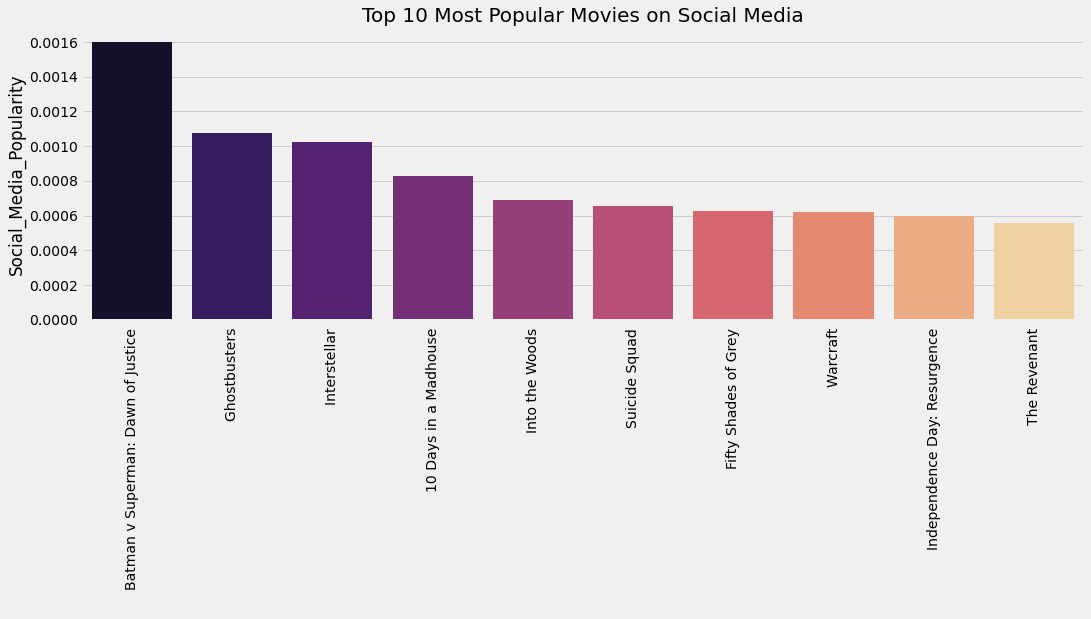

In [55]:
sns.barplot(x['movie_title'], x['Social_Media_Popularity'], palette ='magma')
plt.title('Top 10 Most Popular Movies on Social Media', fontsize =20)
plt.xticks(rotation =90, fontsize =14)
plt.xlabel(' ')
plt.show()

In [57]:
sObservation: Ghostbusters was still repeated. Both entries have same social media popularity

### Most Bankable Genres

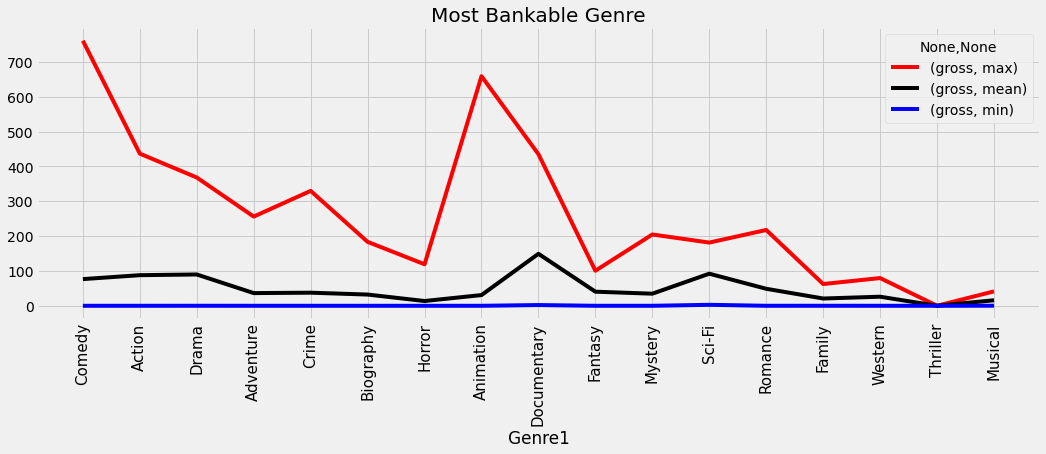

In [74]:
#Comparing Genres with Gross

#Group genres and get min, max,avg of movies by genre
display(data[['Genre1', 'gross']].groupby(['Genre1']).agg(['max','mean', 'min']).style.background_gradient(cmap= 'Wistia'))
 
#Lineplot                                                                                                        
data[['Genre1', 'gross']].groupby(['Genre1']).agg(['max','mean', 'min']).plot(kind="line", color =['red','black','blue'])
plt.title("Most Bankable Genre", fontsize=20)
plt.xticks(np.arange(17),['Comedy','Action', 'Drama', 'Adventure', 'Crime', 'Biography', 'Horror','Animation','Documentary','Fantasy','Mystery','Sci-Fi','Romance','Family','Western','Thriller','Musical'], rotation=90, fontsize=15)
plt.show()

In [75]:
#Observations: Action an Drama have impressive max gross, their avg are also impressive
# Family, Musical have highest min gross, their avg gross are also impressive.

In [68]:
data['Genre1'].value_counts()

Comedy         1029
Action          962
Drama           693
Adventure       375
Crime           258
Biography       207
Horror          160
Animation        46
Documentary      40
Fantasy          37
Mystery          24
Sci-Fi            8
Romance           3
Family            3
Western           3
Thriller          3
Musical           2
Name: Genre1, dtype: int64

### The most Profitable Movie from Each Genre

In [ ]:
display(data.loc[data.groupby(data['Genre1'])])